<a href="https://colab.research.google.com/github/Vcetpreeti/DS_internship/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.naive_bayes import GaussianNB
df=pd.read_csv("winequalityN.csv")
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [2]:
df1=df[['volatile acidity','alcohol','sulphates','pH','total sulfur dioxide','quality']]

#dealing with missing values
df1['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df1['sulphates'].fillna(df['sulphates'].mean(), inplace=True)
df1['pH'].fillna(df['pH'].mean(), inplace=True)
df1['alcohol'].fillna(df['alcohol'].mean(), inplace=True)
df1.head(500)
df1['total sulfur dioxide'].isna().sum()

<ipython-input-2-c1101fbc31d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
<ipython-input-2-c1101fbc31d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sulphates'].fillna(df['sulphates'].mean(), inplace=True)
<ipython-input-2-c1101fbc31d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pH'].fillna(df['pH'].mean(), inplace=True)
<ipython-inpu

0

In [3]:
df1.isnull().sum()

volatile acidity        0
alcohol                 0
sulphates               0
pH                      0
total sulfur dioxide    0
quality                 0
dtype: int64

In [20]:
#handling outliers
def handle_outliers(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[column] = df[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))
handle_outliers(df, 'pH')

def handle_outliers(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[column] = df1[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))

handle_outliers(df, 'volatile acidity')


<ipython-input-20-1c7593490039>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))
<ipython-input-20-1c7593490039>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))


In [21]:

def handle_outliers(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[column] = df1[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))

    handle_outliers(df1, 'total sulfur dioxide ')
def handle_outliers(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[column] = df1[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))

    handle_outliers(df1, 'alcohol ')
def handle_outliers(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[column] = df1[column].apply(lambda x: upper if x > upper else (lower if x < lower else x))
    handle_outliers(df1, 'alcohol ')


In [29]:
#handlinG X and Y
x=df1[['alcohol','volatile acidity','pH','total sulfur dioxide']]
y=df1[['quality']]


In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Create an imputer to replace missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer on your feature data and transform it
x = imputer.fit_transform(x)

# Check the distribution of your target variable
print(y['quality'].value_counts())

# Now, apply SMOTE with a reduced number of neighbors if necessary
smote = SMOTE(random_state=0, k_neighbors=min(y['quality'].value_counts()) - 1)  # Adjust k_neighbors
x, y = smote.fit_resample(x, y)


quality
6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64


In [35]:
pca = PCA(n_components=2)
x= pca.fit_transform(x)

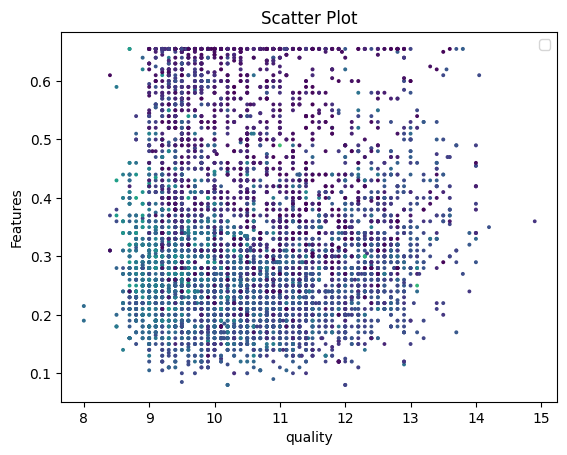

In [37]:
#visualisation of data
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df1["alcohol"], df1["volatile acidity"],df1["pH"],df1["total sulfur dioxide"])
plt.title("Scatter Plot")
plt.xlabel("quality")
plt.ylabel("Features")
plt.legend()
plt.show()

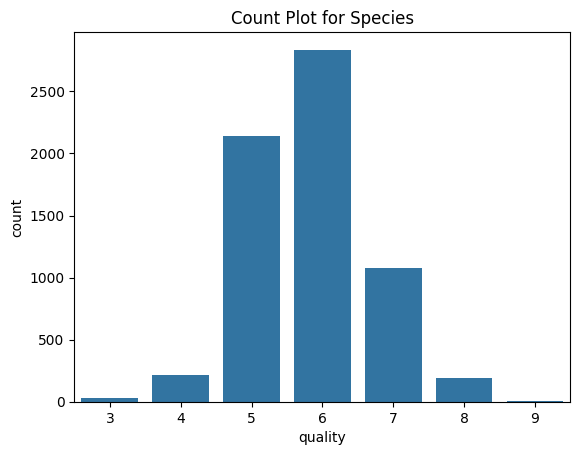

In [38]:
sns.countplot(x='quality', data = df1)
plt.title("Count Plot for quality")
plt.show()

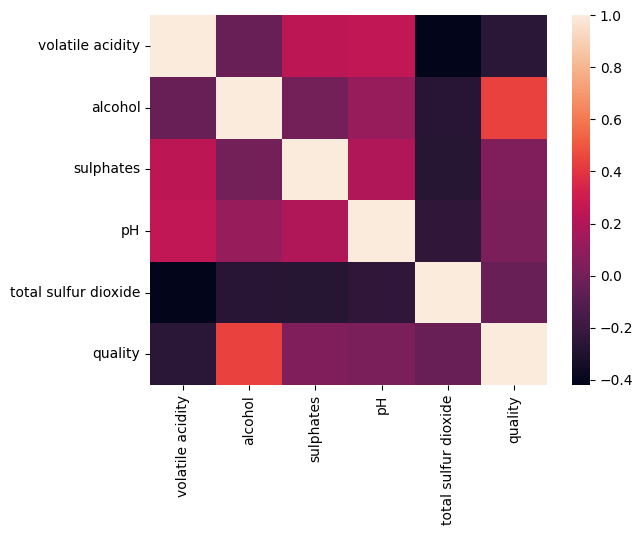

In [39]:
sns.heatmap(df1.corr())
plt.show()

In [40]:
#Applying Algorithms
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

logr = LogisticRegression()

logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2973472128945601
Classification Report:
               precision    recall  f1-score   support

           3       0.06      0.00      0.01       898
           4       0.26      0.32      0.28       821
           5       0.30      0.54      0.38       830
           6       0.22      0.17      0.19       851
           7       0.24      0.25      0.25       834
           8       0.22      0.12      0.16       845
           9       0.43      0.70      0.53       877

    accuracy                           0.30      5956
   macro avg       0.25      0.30      0.26      5956
weighted avg       0.25      0.30      0.25      5956

Confusion Matrix:
 [[  3 327 297  91  72  89  19]
 [ 14 262 319  77 124   9  16]
 [  9 195 447  95  51  19  14]
 [ 15 133 261 141 129  59 113]
 [ 10  78  97 100 207  96 246]
 [  1  24  81  55 169 101 414]
 [  0   0   0  91  96  80 610]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred1=nb.predict(X_test)

print("Naive Bayes: ",accuracy_score(y_test,y_pred1))

Naive Bayes:  0.35577568838146406


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.6665547347212895


In [48]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.710711887172599


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

<ipython-input-52-bd9ea08f1704>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  train=rf.fit(X_train,y_train)


0.7352249832102082


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

gbm = GradientBoostingClassifier(n_estimators=10)

gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Print evaluation metrics
print("GBM Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM Accuracy: 0.45147750167897915
